Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns = feature_names)

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
target = boston.target

In [11]:
y = pd.DataFrame(target, columns = ['Price'])

In [12]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler(with_mean = False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [21]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [22]:
X_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

In [23]:
X_train_tsne.shape

(404, 2)

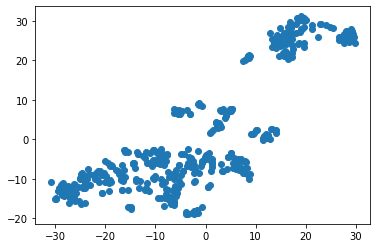

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [25]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [27]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [28]:
pd.value_counts(labels_train)

2    191
0    127
1     86
dtype: int64

In [29]:
labels_test = kmeans.predict(X_test_scaled)

Text(20, 20, 'Кластер 2')

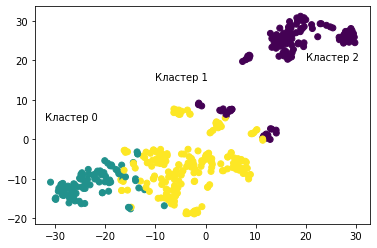

In [31]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.text(-32, 5, 'Кластер 0')
plt.text(-10, 15, 'Кластер 1')
plt.text(20, 20, 'Кластер 2')

In [33]:
y_train.mean()

Price    22.796535
dtype: float64

In [34]:
y_train[labels_train == 0].mean()

Price    16.165354
dtype: float64

In [35]:
y_train[labels_train == 1].mean()

Price    27.788372
dtype: float64

In [36]:
y_train[labels_train == 2].mean()

Price    24.958115
dtype: float64

In [38]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

10.797028425196853

In [39]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

0.07356558139534886

In [40]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.42166020942408367